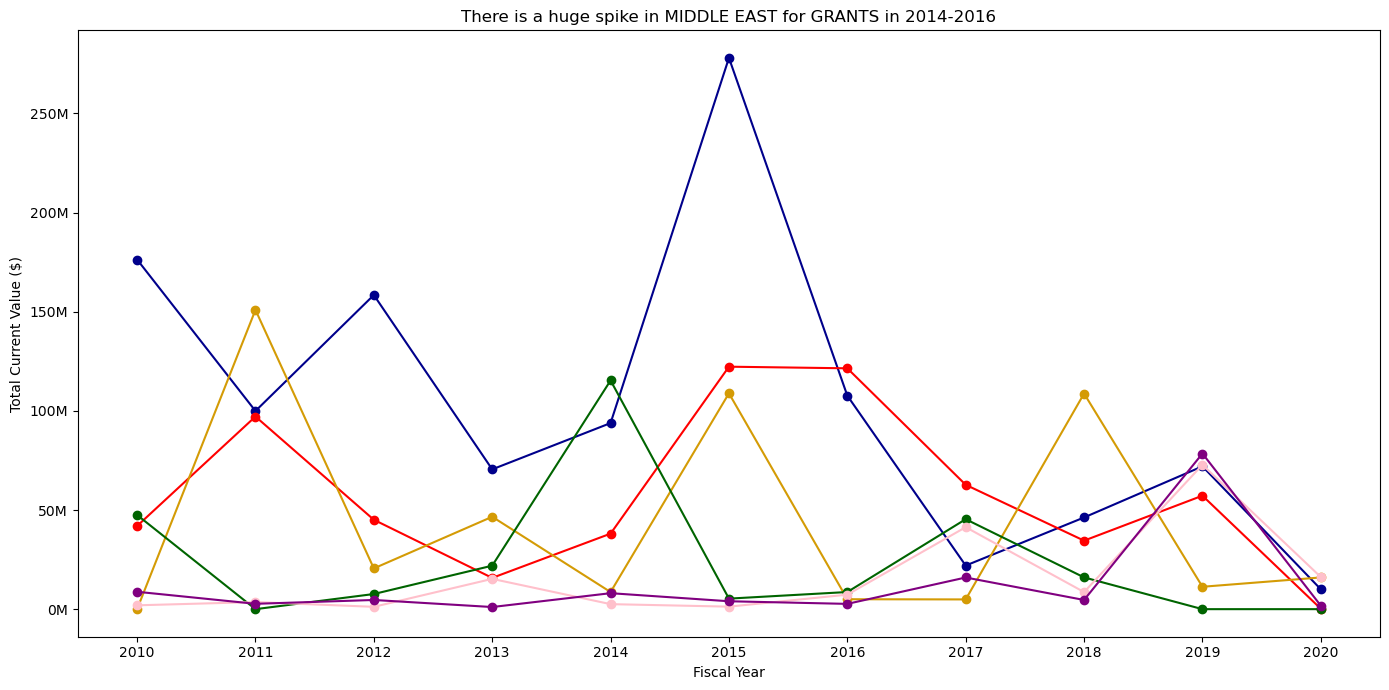

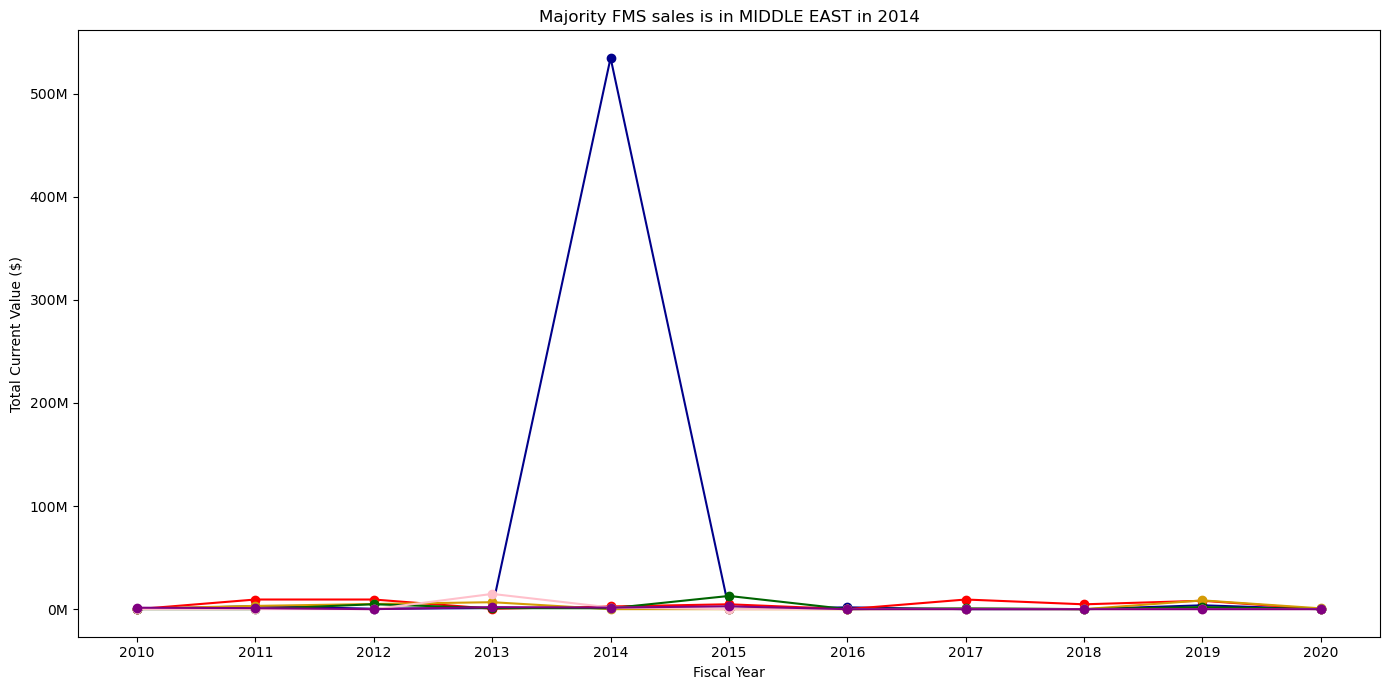

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_excel("C:/Users/Mugdha Shah/Desktop/mism 6210/final term/EDA_Public_Report_2020-06-15.xlsx")

#graph Grant
non_cancelled_rejected_orders = data[~data['Status'].isin(['EDA Cancelled', 'EDA Rejected'])]
grant_data = non_cancelled_rejected_orders[non_cancelled_rejected_orders['Transfer Authority'] == 'Grant Authority']
grant_region_time_series = grant_data.groupby(['Region(Transfer to)', 'Fiscal Year of Request'])['Total Current Value'].sum().unstack(fill_value=0)
top_regions = grant_region_time_series.sum(axis=1).nlargest(6).index
top_regions_data = grant_region_time_series.loc[top_regions]
vibgyor_colors = ['darkblue', 'red', '#d49b05', 'darkgreen', 'pink', 'purple']

def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

plt.figure(figsize=(14, 7))
for region, color in zip(top_regions_data.index, vibgyor_colors):
    plt.plot(top_regions_data.columns, top_regions_data.loc[region], marker='o', label=region, color=color)

plt.title('There is a huge spike in MIDDLE EAST for GRANTS in 2014-2016')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Current Value ($)')
plt.xticks(top_regions_data.columns)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))
plt.tight_layout()
plt.show()

##graph for fms sales
non_cancelled_rejected_orders = data[~data['Status'].isin(['EDA Cancelled', 'EDA Rejected'])]
fms_data = non_cancelled_rejected_orders[non_cancelled_rejected_orders['Transfer Authority'] == 'FMS Sales']
fms_region_time_series = fms_data.groupby(['Region(Transfer to)', 'Fiscal Year of Request'])['Total Current Value'].sum().unstack(fill_value=0)
top_fms_regions = fms_region_time_series.sum(axis=1).nlargest(6).index
top_fms_regions_data = fms_region_time_series.loc[top_fms_regions]
vibgyor_colors = ['darkblue', 'red', '#d49b05', 'darkgreen', 'pink', 'purple']

def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

plt.figure(figsize=(14, 7))
for region, color in zip(top_fms_regions_data.index, vibgyor_colors):
    plt.plot(top_fms_regions_data.columns, top_fms_regions_data.loc[region], marker='o', label=region, color=color)

plt.title('Majority FMS sales is in MIDDLE EAST in 2014')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Current Value ($)')
plt.xticks(top_fms_regions_data.columns)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))
plt.tight_layout()
plt.show() 

#labels to these lines were added in CANVA to give color coded labels to the lines
# the sankey chart was made in ADOBE Illustrator